In [ ]:
import pandas as pd
output = '/content/Conversation_Dataset.csv'
df = pd.read_csv(output, on_bad_lines='skip', encoding='utf-8')
df.head()

,conversation_id,speaker,date_time,text
0,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:33+00:00,"Good morning, thank you for calling Union Fina..."
1,2b6544c382e6423b96785c1a135d8e95,Customer,2023-09-06T14:33:41.307692+00:00,"Hi Monroe, my name is Della. I need help manag..."
2,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:50.538461+00:00,"Of course, Della. I'd be happy to help you wit..."
3,2b6544c382e6423b96785c1a135d8e95,Customer,2023-09-06T14:34:01.153846+00:00,Sure thing. My account number is 1234567890.
4,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:34:04.384615+00:00,"Thank, thank you for providing that informatio..."


In [ ]:
df.isnull().sum()


,0
conversation_id,0
speaker,0
date_time,0
text,630


In [ ]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5532112 entries, 0 to 5532111
Data columns (total 4 columns):
 #   Column           Dtype 
---  ------           ----- 
 0   conversation_id  object
 1   speaker          object
 2   date_time        object
 3   text             object
dtypes: object(4)
memory usage: 168.8+ MB


,conversation_id,speaker,date_time,text
count,5532112,5532112,5532112,5531482
unique,301822,2,5129253,4144680
top,5b0d1a6de9bd4d96ac3045b9a8f3b9ab,agent,2023-09-11T16:08:59.615384+00:00,Bye.
freq,487,2880214,429,37611


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader_lexicon resource - Handle the case where it's already downloaded
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Load data
output = '/content/Conversation_Dataset.csv'
df = pd.read_csv(output, encoding='utf-8')

# Vectorized function to calculate sentiment scores
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(str(x))['compound'])

# Save results
df.to_csv('/content/Conversation_Dataset_with_sentiment.csv', index=False)


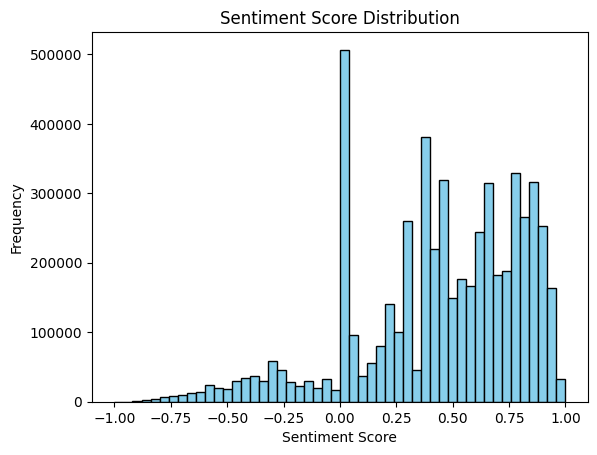

count    5.532112e+06
mean     4.410511e-01
std      3.725613e-01
min     -9.999000e-01
25%      2.263000e-01
50%      4.926000e-01
75%      7.579000e-01
max      9.998000e-01
Name: sentiment, dtype: float64


In [ ]:
import matplotlib.pyplot as plt

# Plot the distribution of sentiment scores
plt.hist(df['sentiment'], bins=50, color='skyblue', edgecolor='black')
plt.title('Sentiment Score Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

# Get basic statistics
print(df['sentiment'].describe())


In [ ]:
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply categorization
df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Example of frequency of sentiment categories
print(df['sentiment_category'].value_counts())


sentiment_category
Positive    4518494
Neutral      525901
Negative     487717
Name: count, dtype: int64


In [ ]:
# Filter positive sentiment
positive_df = df[df['sentiment'] > 0.05]

# Filter negative sentiment
negative_df = df[df['sentiment'] < -0.05]

# Display a few rows of positive and negative sentiment
print(positive_df.head())
print(negative_df.head())


                    conversation_id   speaker  \
0  2b6544c382e6423b96785c1a135d8e95     agent   
1  2b6544c382e6423b96785c1a135d8e95  Customer   
2  2b6544c382e6423b96785c1a135d8e95     agent   
3  2b6544c382e6423b96785c1a135d8e95  Customer   
4  2b6544c382e6423b96785c1a135d8e95     agent   

                          date_time  \
0         2023-09-06T14:33:33+00:00   
1  2023-09-06T14:33:41.307692+00:00   
2  2023-09-06T14:33:50.538461+00:00   
3  2023-09-06T14:34:01.153846+00:00   
4  2023-09-06T14:34:04.384615+00:00   

                                                text  sentiment  \
0  Good morning, thank you for calling Union Fina...     0.6597   
1  Hi Monroe, my name is Della. I need help manag...     0.6597   
2  Of course, Della. I'd be happy to help you wit...     0.8271   
3       Sure thing. My account number is 1234567890.     0.3818   
4  Thank, thank you for providing that informatio...     0.7579   

  sentiment_category  
0           Positive  
1           Positive 

In [ ]:
print(df.dtypes)


conversation_id        object
speaker                object
date_time              object
text                   object
sentiment             float64
sentiment_category     object
dtype: object


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')


In [ ]:
print(df.dtypes)


conversation_id                    object
speaker                            object
date_time             datetime64[ns, UTC]
text                               object
sentiment                         float64
sentiment_category                 object
dtype: object


In [ ]:
print(df['date_time'].isna().sum())  # Count NaT values
df.dropna(subset=['date_time'], inplace=True)


5044147


In [ ]:
df['response_time'] = df.groupby('conversation_id')['date_time'].diff().dt.total_seconds()
df['response_time'] = df['response_time'].fillna(0)  # Fixed warning


In [ ]:
print(df[['date_time', 'response_time']].head(10))


                    date_time  response_time
0   2023-09-06 14:33:33+00:00            0.0
17  2023-09-16 13:54:25+00:00            0.0
31  2023-09-04 14:08:17+00:00            0.0
55  2023-09-21 13:12:44+00:00            0.0
128 2023-09-09 15:02:50+00:00            0.0
147 2023-09-19 16:05:49+00:00            0.0
158 2023-09-25 16:27:10+00:00            0.0
173 2023-09-04 08:02:43+00:00            0.0
190 2023-09-19 10:32:33+00:00            0.0
211 2023-09-15 12:43:03+00:00            0.0


In [ ]:
df['is_query_resolved'] = df['text'].str.contains(
    "resolved|fixed|thank you|issue solved|problem solved",
    case=False,
    na=False
).astype(int)


In [ ]:
df['conversation_length'] = df.groupby('conversation_id')['text'].transform('count')


In [ ]:
features = df[['sentiment', 'response_time', 'is_query_resolved', 'conversation_length']].fillna(0)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)


In [ ]:
cluster_map = {
    df.groupby('cluster')['sentiment'].mean().idxmax(): "Satisfied",
    df.groupby('cluster')['sentiment'].mean().idxmin(): "Not Satisfied",
    df.groupby('cluster')['sentiment'].mean().idxmax(skipna=True): "Neutral"
}

df['satisfaction'] = df['cluster'].map(cluster_map)


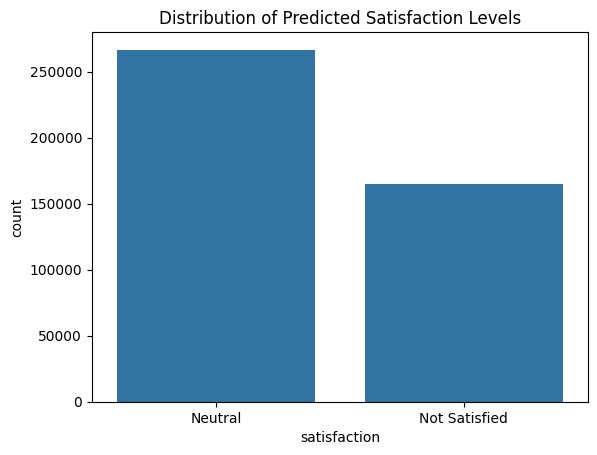

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['satisfaction'])
plt.title("Distribution of Predicted Satisfaction Levels")
plt.show()


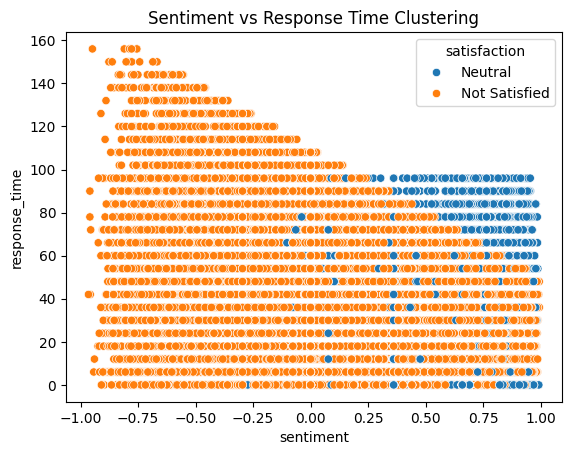

In [ ]:
sns.scatterplot(x=df['sentiment'], y=df['response_time'], hue=df['satisfaction'])
plt.title("Sentiment vs Response Time Clustering")
plt.show()


In [ ]:
df.to_csv('customer_satisfaction_predictions.csv', index=False)


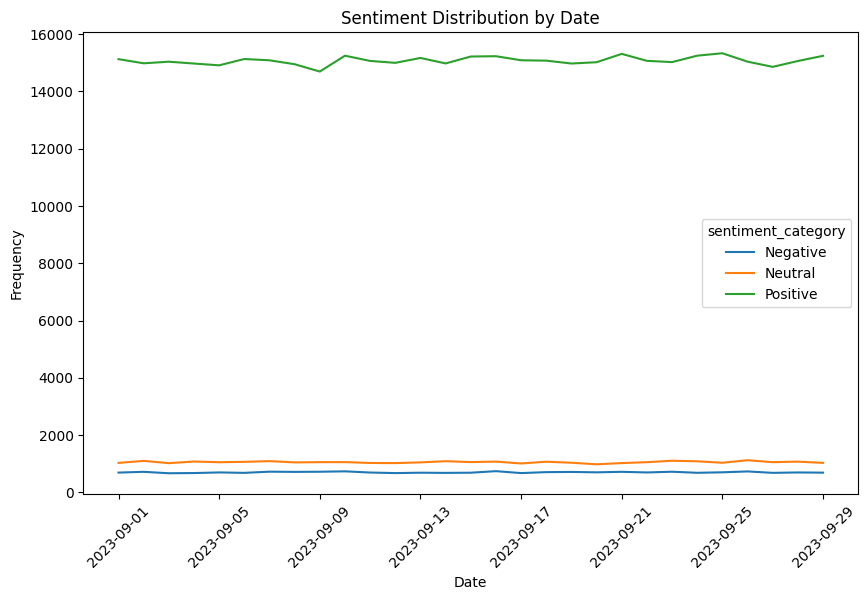

In [ ]:
# Categorize sentiment into Positive, Neutral, Negative
def categorize_sentiment(score):
    if score > 0.05:
        return 'Positive'
    elif score < -0.05:
        return 'Negative'
    else:
        return 'Neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Group by date and calculate sentiment distribution
sentiment_distribution_by_date = df.groupby([df['date_time'].dt.date, 'sentiment_category']).size().unstack(fill_value=0)

# Plot sentiment distribution by date
sentiment_distribution_by_date.plot(kind='line', figsize=(10, 6))
plt.title('Sentiment Distribution by Date')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Conversation_Dataset_with_sentiment.csv')

DBSCAN

In [ ]:
df.head()

,conversation_id,speaker,date_time,text,sentiment
0,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:33+00:00,"Good morning, thank you for calling Union Fina...",0.6597
1,2b6544c382e6423b96785c1a135d8e95,Customer,2023-09-06T14:33:41.307692+00:00,"Hi Monroe, my name is Della. I need help manag...",0.6597
2,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:33:50.538461+00:00,"Of course, Della. I'd be happy to help you wit...",0.8271
3,2b6544c382e6423b96785c1a135d8e95,Customer,2023-09-06T14:34:01.153846+00:00,Sure thing. My account number is 1234567890.,0.3818
4,2b6544c382e6423b96785c1a135d8e95,agent,2023-09-06T14:34:04.384615+00:00,"Thank, thank you for providing that informatio...",0.7579


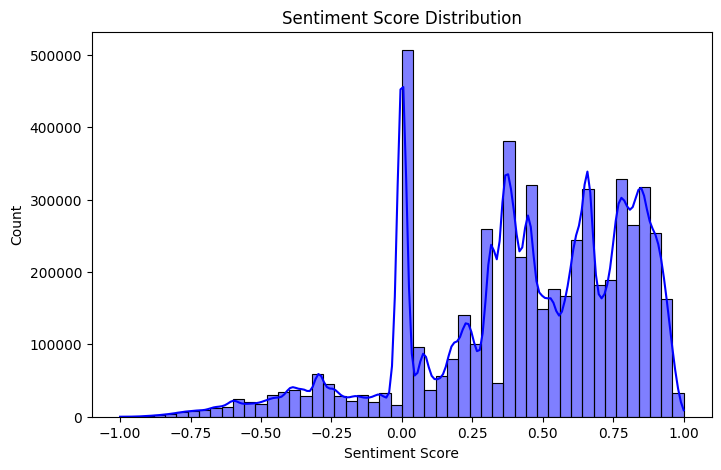

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df['sentiment'], bins=50, kde=True, color='blue')
plt.title("Sentiment Score Distribution")
plt.xlabel("Sentiment Score")
plt.ylabel("Count")
plt.show()


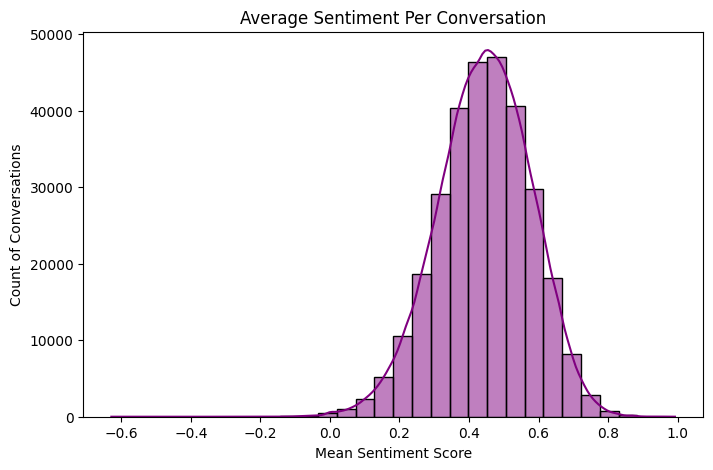

In [ ]:
df_grouped = df.groupby('conversation_id')['sentiment'].mean().reset_index()

plt.figure(figsize=(8,5))
sns.histplot(df_grouped['sentiment'], bins=30, kde=True, color='purple')
plt.title("Average Sentiment Per Conversation")
plt.xlabel("Mean Sentiment Score")
plt.ylabel("Count of Conversations")
plt.show()


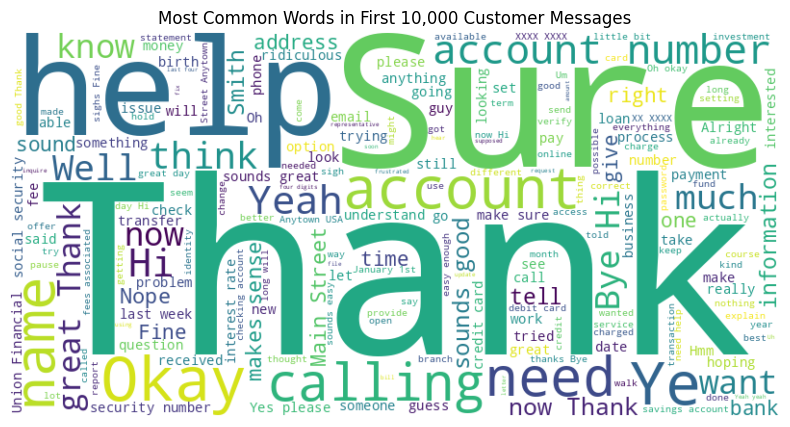

In [ ]:

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Select first 10,000 customer messages
customer_text = ' '.join(df[df['speaker'] == 'Customer']['text'].dropna().head(10000))

# Instantiate wordcloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(customer_text)

# Plot the Word Cloud
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Common Words in First 10,000 Customer Messages")
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('/content/Conversation_Dataset_with_sentiment.csv')

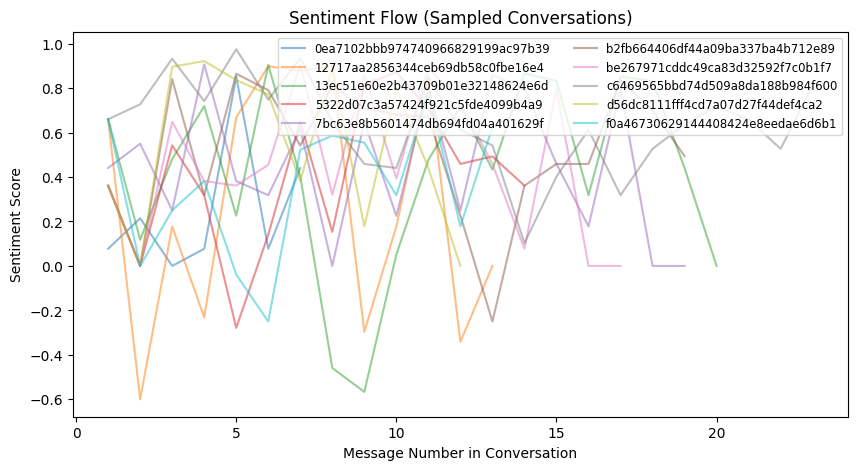

In [ ]:
import random
import matplotlib.pyplot as plt

# Sample up to 10 unique conversation IDs
conversation_ids = df['conversation_id'].unique()
num_samples = min(10, len(conversation_ids))
sampled_conversation_ids = random.sample(list(conversation_ids), num_samples)

# Filter DataFrame for only sampled conversations
df_sample = df[df['conversation_id'].isin(sampled_conversation_ids)].copy()

# Add 'message_number' to track message order
df_sample['message_number'] = df_sample.groupby('conversation_id').cumcount() + 1

# Plot sentiment flow
plt.figure(figsize=(10, 5))

for convo_id, data in df_sample.groupby('conversation_id'):
    plt.plot(data['message_number'], data['sentiment'], alpha=0.5, label=convo_id)

plt.xlabel("Message Number in Conversation")
plt.ylabel("Sentiment Score")
plt.title("Sentiment Flow (Sampled Conversations)")
plt.legend(loc="upper right", fontsize="small", ncol=2)  # Show legend
plt.show()


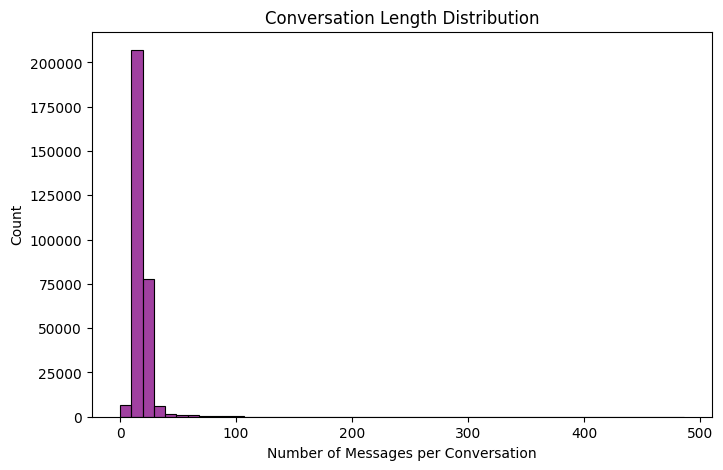

In [ ]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.histplot(df.groupby('conversation_id')['text'].count(), bins=50, color='purple')
plt.title("Conversation Length Distribution")
plt.xlabel("Number of Messages per Conversation")
plt.ylabel("Count")
plt.show()
